<a href="https://colab.research.google.com/github/mburu-mwangi/Lung-Cancer-/blob/main/mass_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lung cancer Analysis


In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading of the Dataset

In [ ]:
# Loading the dataset
url='https://drive.google.com/file/d/1hIjlEeOgcVUQQ36LcnyT1_xBNBuRE7NY/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2)

In [ ]:
#df_poland = pd.read_csv("covid_caner_poland.csv")

In [ ]:
# Craeting a copy of the same set
df_poland =  df.copy()

In [ ]:
# Checking the head of the dataset
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
0,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,7.0,Alive
1,NIE,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,IV,Advanced,6.0,3.0,Alive
2,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,5.0,Alive
3,NIE,2019,Open,Lobectomy,NO,Squamous cell carcinoma,I,Early,6.0,4.0,Alive
4,TAK,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,5.0,4.0,Alive


In [ ]:
# Creating usique identifiers of my dataset.
df_poland['unique_ID'] = [i for i in range(df_poland.shape[0])]
# Confirming the operation
df_poland.set_index('unique_ID').head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,7.0,Alive
1,NIE,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,IV,Advanced,6.0,3.0,Alive
2,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,5.0,Alive
3,NIE,2019,Open,Lobectomy,NO,Squamous cell carcinoma,I,Early,6.0,4.0,Alive
4,TAK,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,5.0,4.0,Alive


# Data Cleaning 

In [ ]:
#df_poland.to_csv('new_poland_covid_cancer.csv')

## Duplicated Values

In [ ]:
# Checking for duplicated values
df_poland.duplicated().sum()

0

#### There are no duplicated values in the dataset

## Checking for missing values in the dataset

In [ ]:
# Creating a function to check for percentage of missing values and put it in a dataframe
def missing_percentage(data):
  df=(data.isnull().sum()/len(data)*100)
  missing_frame=pd.DataFrame({"Column_names":df.index,"%_missing":df.values})
  return missing_frame


In [ ]:
# Executing the function
missing_percentage(df_poland)

,Column_names,%_missing
0,Invasive mediastinal staging,0.000000
1,Date of surgery,0.000000
2,Approach,0.109559
3,Type of surgery,0.000000
4,Sleeve - bronchial,0.000000
5,Histology,1.054506
6,Stage,1.314708
7,Stage.1,1.314708
8,Total hospital stay,1.698165
9,Postoperative hospital stay,2.643111


#### Dealing with missing values

In [ ]:
# Checking datatypes
df_poland[['Histology','Stage','Stage.1','Total hospital stay','Postoperative hospital stay']].dtypes

Histology                       object
Stage                           object
Stage.1                         object
Total hospital stay            float64
Postoperative hospital stay    float64
dtype: object

In [ ]:
# A function to deal with missing values in the continous variables
def fill_miss(data,col1,col2):
  df1=data[col1].groupby(data[col2]).mean()
  if data[col2].any =='Alive':
    data[col1]=data[col1].fillna(df1[0])
  else:
    data[col1]=data[col1].fillna(df1[1])
  return data.isnull().sum()


In [ ]:
# Executong the function on the total hospital stay column
fill_miss(df_poland,'Total hospital stay','Outcome at discharge')

Invasive mediastinal staging      0
Date of surgery                   0
Approach                          8
Type of surgery                   0
Sleeve - bronchial                0
Histology                        77
Stage                            96
Stage.1                          96
Total hospital stay               0
Postoperative hospital stay     193
Outcome at discharge              0
unique_ID                         0
dtype: int64

In [ ]:
# Executing the function on the post operative hospital stay column
fill_miss(df_poland,'Postoperative hospital stay','Outcome at discharge')

Invasive mediastinal staging     0
Date of surgery                  0
Approach                         8
Type of surgery                  0
Sleeve - bronchial               0
Histology                       77
Stage                           96
Stage.1                         96
Total hospital stay              0
Postoperative hospital stay      0
Outcome at discharge             0
unique_ID                        0
dtype: int64

#### Dealing with missing value in the other columns

In [ ]:
# Categorical column which had a missing percentage of about 1.3%
df_poland[['Histology','Stage','Stage.1']].isnull().sum()

Histology    77
Stage        96
Stage.1      96
dtype: int64

#### Dropping the missing values in the categorical columns

In [ ]:
# Dropping the missing values in the  categorical columns
df_poland.dropna(axis=0,inplace=True)

In [ ]:
# Calling the function to check for missing values
missing_percentage(df_poland)

,Column_names,%_missing
0,Invasive mediastinal staging,0.0
1,Date of surgery,0.0
2,Approach,0.0
3,Type of surgery,0.0
4,Sleeve - bronchial,0.0
5,Histology,0.0
6,Stage,0.0
7,Stage.1,0.0
8,Total hospital stay,0.0
9,Postoperative hospital stay,0.0


#### There are no more missing values in the dataset.

In [ ]:
# Setting unique_ID as the index
df_poland = df_poland.set_index('unique_ID')

In [ ]:
# Confirming the operation
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,7.0,Alive
1,NIE,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,IV,Advanced,6.0,3.0,Alive
2,NIE,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,5.0,Alive
3,NIE,2019,Open,Lobectomy,NO,Squamous cell carcinoma,I,Early,6.0,4.0,Alive
4,TAK,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,5.0,4.0,Alive


## Checking for outliers and anomalies

In [ ]:
# Checking for anomalies in the Invasive mediastinal staging column
df_poland['Invasive mediastinal staging'].unique()
# The half of the dataset is in Polish

array(['NIE', 'TAK', 'NO', 'YES'], dtype=object)

In [ ]:
# Function to replace the polish words
def replacing(data,col,old,new):
  data[col]=data[col].str.replace(old,new)
  return data[col].unique()


In [ ]:
# Executing the function on the first column.
replacing(df_poland,'Invasive mediastinal staging','NIE','NO')
replacing(df_poland,'Invasive mediastinal staging','TAK','YES')

array(['NO', 'YES'], dtype=object)

In [ ]:
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,7.0,Alive
1,NO,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,IV,Advanced,6.0,3.0,Alive
2,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,8.0,5.0,Alive
3,NO,2019,Open,Lobectomy,NO,Squamous cell carcinoma,I,Early,6.0,4.0,Alive
4,YES,2019,Open,Lobectomy,NO,Adenocarcinoma,I,Early,5.0,4.0,Alive


In [ ]:
# Checking the unique values in the stage column
df_poland['Stage'].unique()


array(['I', 'IV', 'II', 'III'], dtype=object)

In [ ]:
# Replacing the roman numbers with numerical values
vals_to_replace = {'I':1, 'IV':4, 'II':2, 'III':3}
df_poland['Stage'] = df_poland['Stage'].map(vals_to_replace)

# Confirming the operation
df_poland['Stage'].unique()

array([1, 4, 2, 3])

### Anomalies and Outliers in the continous variables.

In [ ]:
# Checking the datatypes
df_poland.dtypes

Invasive mediastinal staging     object
Date of surgery                   int64
Approach                         object
Type of surgery                  object
Sleeve - bronchial               object
Histology                        object
Stage                             int64
Stage.1                          object
Total hospital stay             float64
Postoperative hospital stay     float64
Outcome at discharge             object
dtype: object

#### Anomalies in the numerical values

In [ ]:
# Checking for anomalies in the Postoperative hospital stay 
df_poland['Postoperative hospital stay'].unique()

array([  7.        ,   3.        ,   5.        ,   4.        ,
        12.        , 146.        ,  14.        ,  11.        ,
         6.        ,  15.        ,   8.        ,  22.76315789,
        18.        ,  43.        ,  13.        ,  30.        ,
        19.        ,  25.        ,  10.        ,  32.        ,
         2.        ,  16.        ,   9.        ,  22.        ,
        28.        ,  54.        ,  23.        ,  41.        ,
        20.        ,  29.        ,  21.        ,  76.        ,
        27.        ,  17.        ,  36.        ,  47.        ,
        70.        ,   1.        ,  85.        ,  34.        ,
        62.        ,  33.        ,  42.        ,  24.        ,
        44.        ,  48.        ,  40.        ,  35.        ,
        31.        ,  26.        ,  50.        ,  46.        ,
        37.        ,  53.        ,  45.        , 190.        ,
        96.        ,  52.        ,  68.        ,  78.        ,
        49.        ,  67.        ,  39.        ,  64.  

In [ ]:
# Checking for anomalies in the Total hospital stay set
df_poland['Total hospital stay'].unique()

array([  8.        ,   6.        ,   5.        ,  31.        ,
       160.        ,  17.        ,  10.        ,  26.        ,
         4.        ,   7.        ,  11.        ,  26.01298701,
        21.        ,  22.        ,  12.        ,  14.        ,
        13.        ,  18.        ,  76.        ,  20.        ,
         9.        ,  48.        ,  35.        ,  29.        ,
        42.        ,   3.        ,  19.        ,  27.        ,
        15.        ,  23.        ,  32.        ,  40.        ,
        64.        ,  43.        , 103.        ,  28.        ,
        30.        ,  16.        ,  88.        ,  37.        ,
        77.        ,  25.        ,  24.        ,  34.        ,
        57.        ,  50.        ,  67.        ,  91.        ,
       102.        ,  49.        ,  63.        ,  39.        ,
        46.        ,  36.        ,  75.        ,  51.        ,
        33.        , 116.        ,  56.        ,  47.        ,
        61.        ,  38.        ,  54.        ,  93.  

#### There were anomalies in both columns in that the days were expressed in decimal form which is an anomally.

In [ ]:
# A function to round off values in both columns to remove the decimals
def rounding(data,col):
  data[col]=data[col].apply(np.ceil)
  return data[col].unique()

In [ ]:
# Rounding the values
rounding(df_poland,'Total hospital stay')

array([  8.,   6.,   5.,  31., 160.,  17.,  10.,  26.,   4.,   7.,  11.,
        27.,  21.,  22.,  12.,  14.,  13.,  18.,  76.,  20.,   9.,  48.,
        35.,  29.,  42.,   3.,  19.,  15.,  23.,  32.,  40.,  64.,  43.,
       103.,  28.,  30.,  16.,  88.,  37.,  77.,  25.,  24.,  34.,  57.,
        50.,  67.,  91., 102.,  49.,  63.,  39.,  46.,  36.,  75.,  51.,
        33., 116.,  56.,  47.,  61.,  38.,  54.,  93., 190.,  97.,  44.,
        45.,  58.,   2., 177.,  41.,  78., 195.,  68.,  53.,  62.,  79.,
        74.,  52.,  59., 162.,  89., 181., 175.,  81.,  82.,  98., 150.,
        71.,  94., 128.])

In [ ]:
# Rounding the values in the post operative hospital stay columns
rounding(df_poland,'Postoperative hospital stay')

array([  7.,   3.,   5.,   4.,  12., 146.,  14.,  11.,   6.,  15.,   8.,
        23.,  18.,  43.,  13.,  30.,  19.,  25.,  10.,  32.,   2.,  16.,
         9.,  22.,  28.,  54.,  41.,  20.,  29.,  21.,  76.,  27.,  17.,
        36.,  47.,  70.,   1.,  85.,  34.,  62.,  33.,  42.,  24.,  44.,
        48.,  40.,  35.,  31.,  26.,  50.,  46.,  37.,  53.,  45., 190.,
        96.,  52.,  68.,  78.,  49.,  67.,  39.,  64.,  91.,  86.,  97.,
       126.,  51.])

In [ ]:
# Checking for numerical values in the dataset
numerical_cols = [col for col in df_poland if df_poland[col].dtypes !='O']
numerical_cols

['Date of surgery',
 'Stage',
 'Total hospital stay',
 'Postoperative hospital stay']

### Outliers in numerical variables

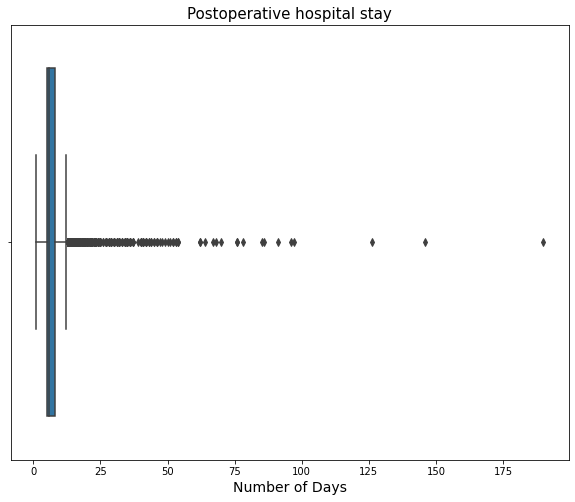

In [ ]:
# Boxplot of the Postoperative Hospital 
plt.figure(figsize=(10,8))
plt.title('Postoperative hospital stay',fontsize=15)
sns.boxplot(x=df_poland['Postoperative hospital stay'])
plt.xlabel('Number of Days',fontsize=14)
plt.show()

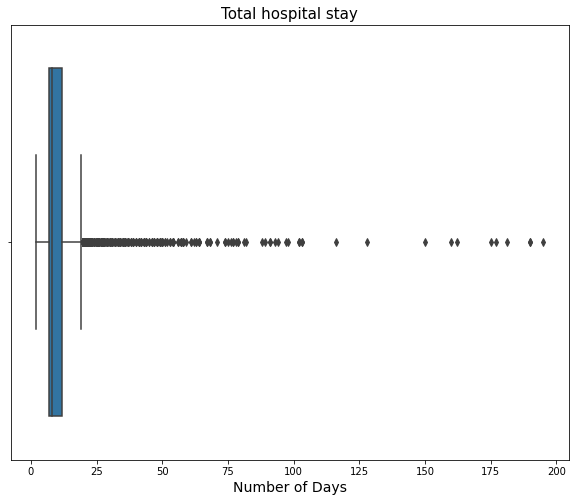

In [ ]:
# Boxplot of the Total hospital stay 
plt.figure(figsize=(10,8))
plt.title('Total hospital stay',fontsize=15)
sns.boxplot(x=df_poland['Total hospital stay'])
plt.xlabel("Number of Days",fontsize=14)
plt.show()

In [ ]:
df_poland['Type of surgery'].unique()

array(['Lobectomy', 'Pneumonectomy', 'Bilobectomy', 'Wedge resection',
       'Segmentectomy', 'Wyci?cie mankietu oskrzela'], dtype=object)

In [ ]:
df_poland['Type of surgery'].value_counts()

Lobectomy                     5455
Segmentectomy                  590
Pneumonectomy                  451
Bilobectomy                    348
Wedge resection                340
Wyci?cie mankietu oskrzela      15
Name: Type of surgery, dtype: int64

In [ ]:
replacing(df_poland,'Type of surgery','Wyci?cie mankietu oskrzela','Broncial cuff excision')# Remember to replace

array(['Lobectomy', 'Pneumonectomy', 'Bilobectomy', 'Wedge resection',
       'Segmentectomy', 'Wyci?cie mankietu oskrzela'], dtype=object)

## Exploratory Data Analysis

1. Univariate Analysis

In [ ]:
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,7.0,Alive
1,NO,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,4,Advanced,6.0,3.0,Alive
2,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,5.0,Alive
3,NO,2019,Open,Lobectomy,NO,Squamous cell carcinoma,1,Early,6.0,4.0,Alive
4,YES,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,5.0,4.0,Alive


In [ ]:
objects= [cols for cols in df_poland if df_poland[cols].dtypes=='O']
objects

['Invasive mediastinal staging',
 'Approach',
 'Type of surgery',
 'Sleeve - bronchial',
 'Histology',
 'Stage.1',
 'Outcome at discharge']

#### The number of patients that underwent invasive medistinal staging were more than those that didnt.

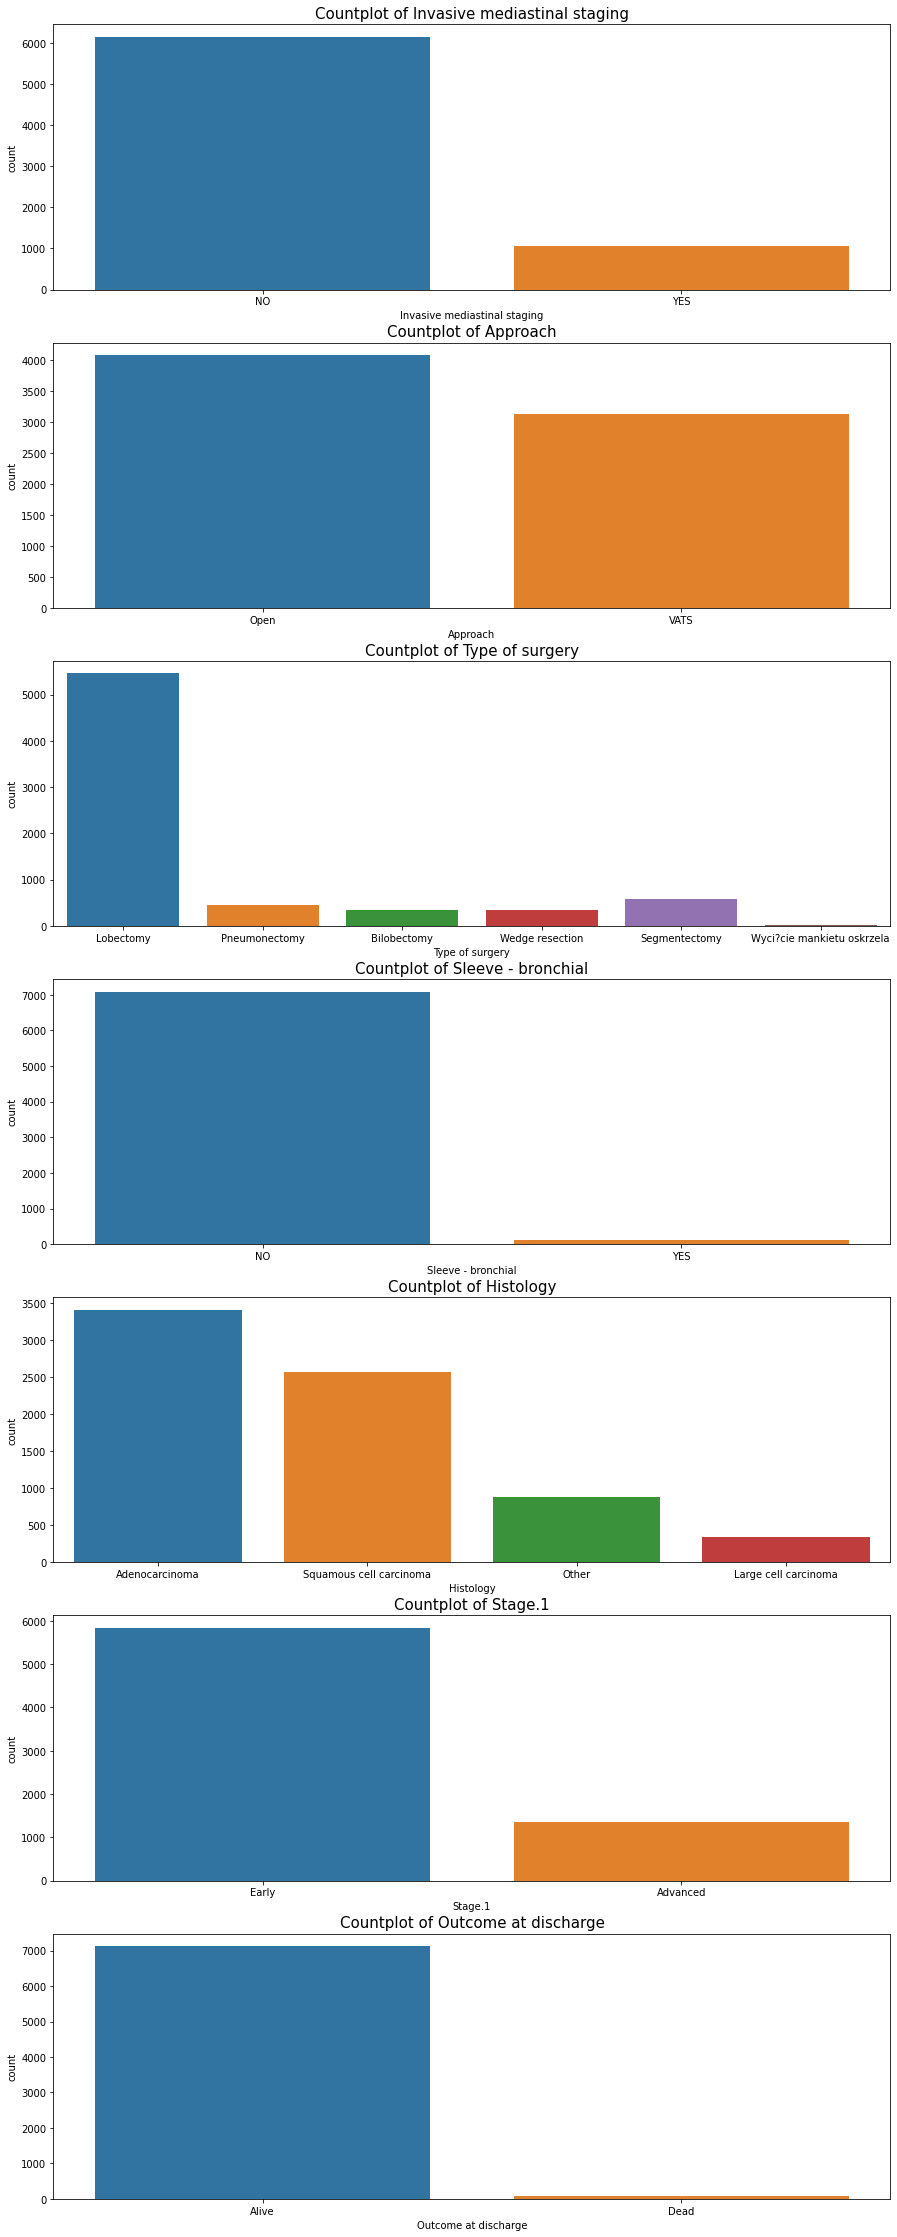

In [ ]:
fig,ax=plt.subplots(len(objects),figsize=(15,40))
for i, col_vals in enumerate(objects):
  sns.countplot(x=df_poland[col_vals],ax=ax[i])
  ax[i].set_title("Countplot of "+format(col_vals),fontsize=15)
plt.show()

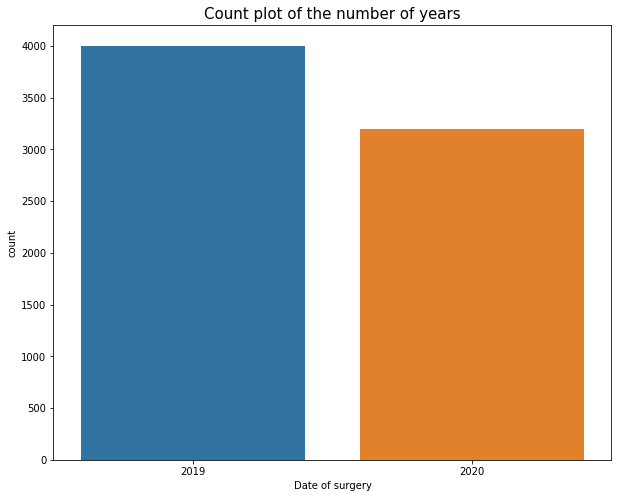

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_poland['Date of surgery'])
plt.title("Count plot of the number of years",fontsize=15)
plt.show()

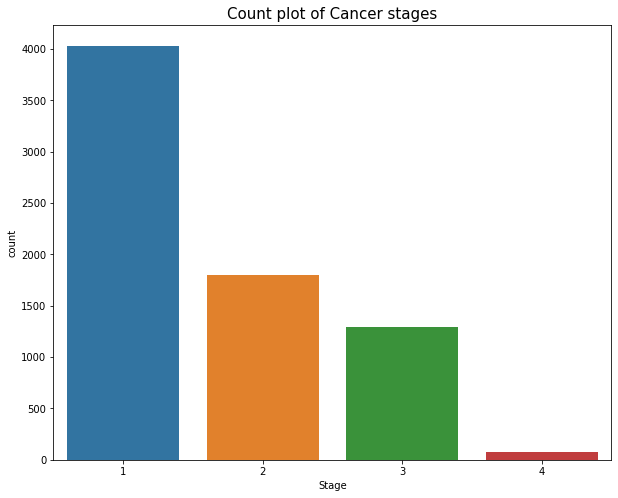

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=df_poland['Stage'])
plt.title("Count plot of Cancer stages",fontsize=15)
plt.show()

*  Fewer patients underwent invasive medialstinal staging as compared to those that underwent.
*  Open surgery was done frequently as compared to the Video-assisted thoracoscopic surgery
* The leading count of surgery types was lobectomy followed closely by segmentectomy. This could be attributed to the simplicity in the  prpceedures.
* A lot of patients presented with Adenocarcinoma as compared to other types of cancers.
* Patients at early stages were found in the observations as compared to those at advanced stages.
* Alive patients were more than dead patients.

### Continous Variables

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


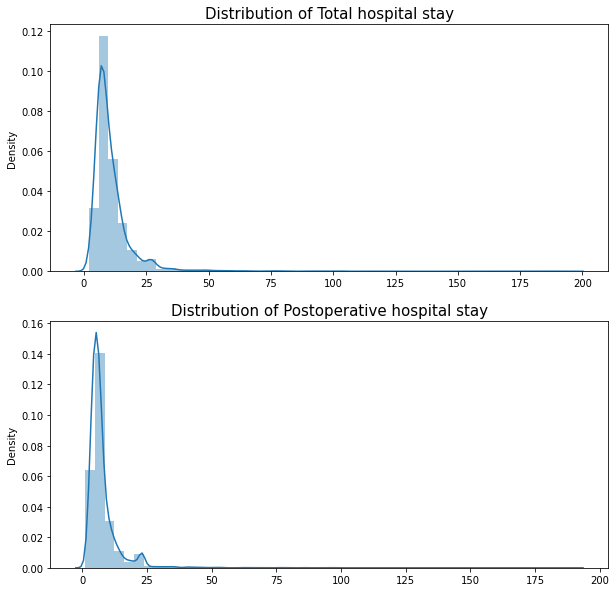

In [ ]:
num_cols=['Total hospital stay','Postoperative hospital stay']
fig,ax=plt.subplots(len(num_cols),figsize=(10,10))
for i, col_vals in enumerate(num_cols):
  sns.distplot(x=df_poland[col_vals],ax=ax[i],kde=True)
  ax[i].set_title("Distribution of "+format(col_vals),fontsize=15)
plt.show()

From the distribution plot we get to see that most people did not spend time in the hospital as our distribution is skewed positively . However , some outliers are seen to be at the 3rd quantile where some patients spent more than 200 days in the hospital.

## Bivariate Analysis.

### This is meant to help us understand the relationships within our dataset.

In [ ]:
df_poland.head()

,Invasive mediastinal staging,Date of surgery,Approach,Type of surgery,Sleeve - bronchial,Histology,Stage,Stage.1,Total hospital stay,Postoperative hospital stay,Outcome at discharge
unique_ID,,,,,,,,,,,
0,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,7.0,Alive
1,NO,2019,VATS,Lobectomy,NO,Squamous cell carcinoma,4,Advanced,6.0,3.0,Alive
2,NO,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,8.0,5.0,Alive
3,NO,2019,Open,Lobectomy,NO,Squamous cell carcinoma,1,Early,6.0,4.0,Alive
4,YES,2019,Open,Lobectomy,NO,Adenocarcinoma,1,Early,5.0,4.0,Alive


# Research Questions
####  * What was the reliability of open surgery as compare to Video assisted surgery considering the post discharge Outcome?


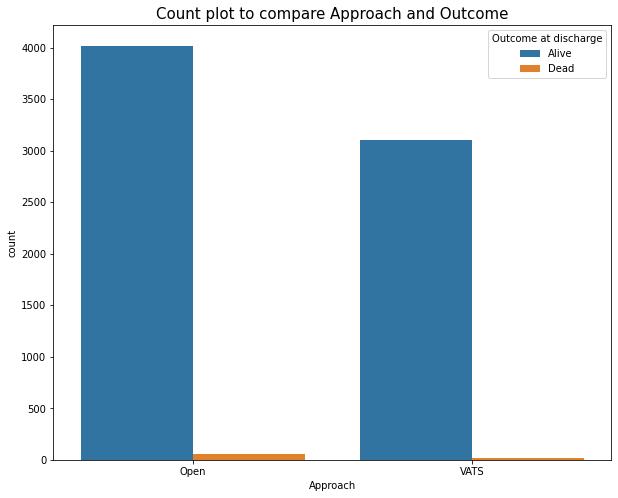

In [ ]:
# Assesing the relationship between The suregery approach to the discharge outcome
plt.figure(figsize=(10,8))
sns.countplot(x='Approach',hue='Outcome at discharge',data=df_poland)
plt.title("Count plot to compare Approach and Outcome",fontsize=15)
plt.show()

#### * Patients who underwent open surgeries had a higher death count as compared to patients that underwent Video assisted thoracoscopic surgery.

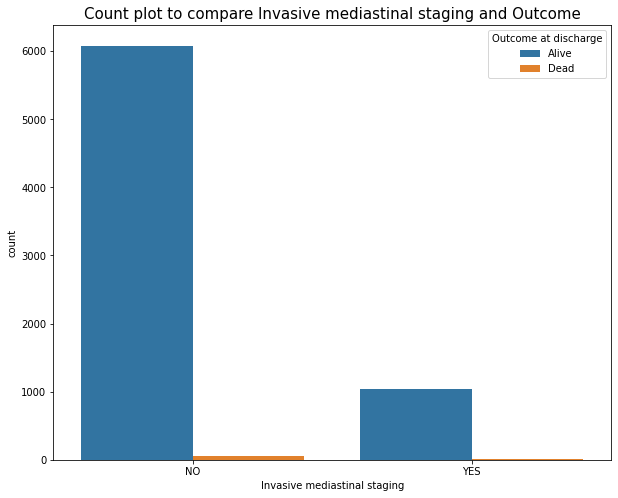

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Invasive mediastinal staging',hue='Outcome at discharge',data=df_poland)
plt.title("Count plot to compare Invasive mediastinal staging and Outcome",fontsize=15)
plt.show() 

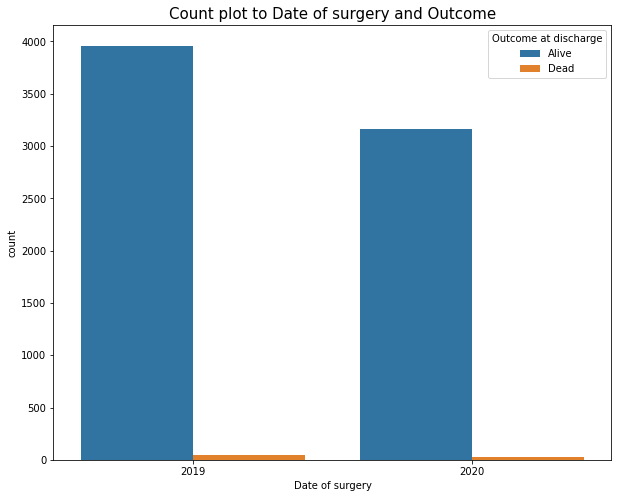

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='Date of surgery',hue='Outcome at discharge',data=df_poland)
plt.title("Count plot to Date of surgery and Outcome",fontsize=15)
plt.show()

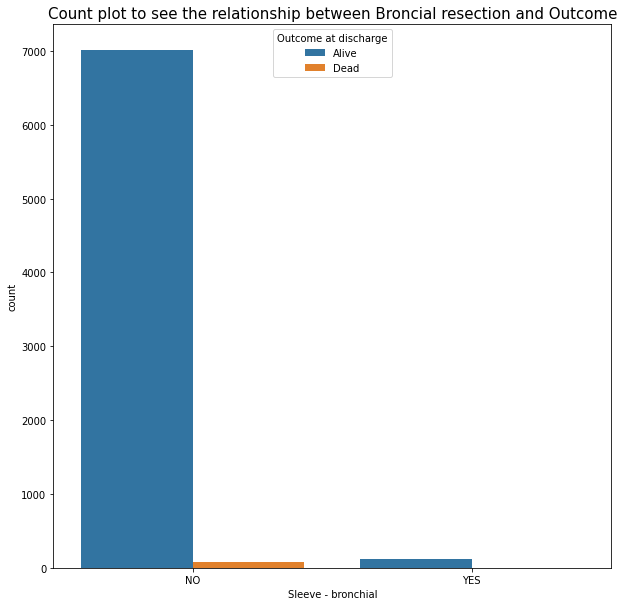

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='Sleeve - bronchial',hue='Outcome at discharge',data=df_poland)
plt.title("Count plot to see the relationship between Broncial resection and Outcome",fontsize=15)
plt.show()